In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [10]:
# Load dataset
df = pd.read_csv("manufacturing_dataset_1000_samples.csv")

# Display first 5 rows
df.head()


,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [11]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Data types and null values
print(df.info())

# Summary statistics
df.describe()

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Dataset shape: (1000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Injection_Temperature       1000 non-null   float64
 2   Injection_Pressure          1000 non-null   float64
 3   Cycle_Time                  1000 non-null   float64
 4   Cooling_Time                1000 non-null   float64
 5   Material_Viscosity          980 non-null    float64
 6   Ambient_Temperature         980 non-null    float64
 7   Machine_Age                 1000 non-null   float64
 8   Operator_Experience         980 non-null    float64
 9   Maintenance_Hours           1000 non-null   int64  
 10  Shift                       1000 non-null   object 
 11  Machine_Type                1000 non-null   object 
 12  Material_Grade              1000 non-null   object 
 13  Day_of_W

Numeric features:
 Index(['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time',
       'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature',
       'Machine_Age', 'Operator_Experience', 'Maintenance_Hours',
       'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 'Efficiency_Score',
       'Machine_Utilization', 'Parts_Per_Hour'],
      dtype='object')


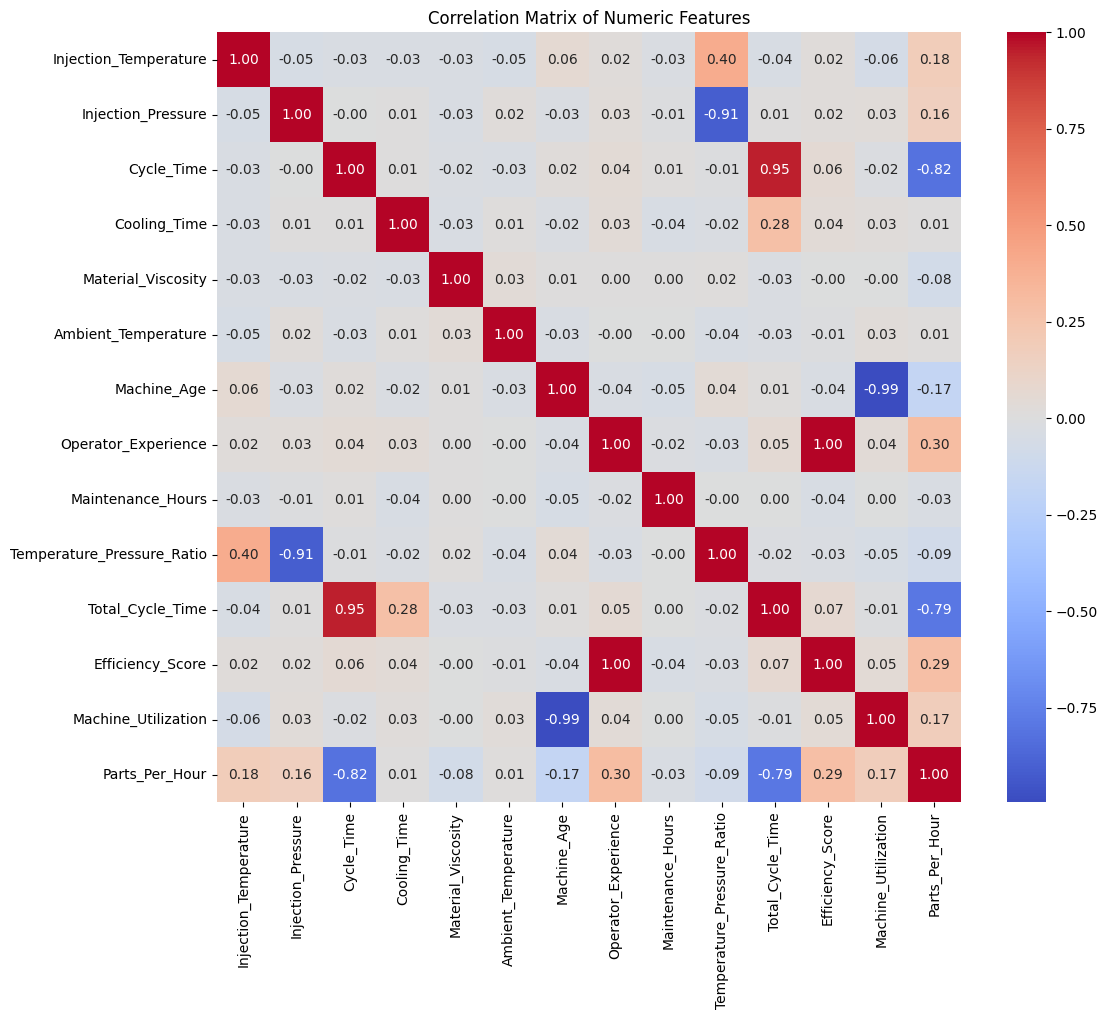

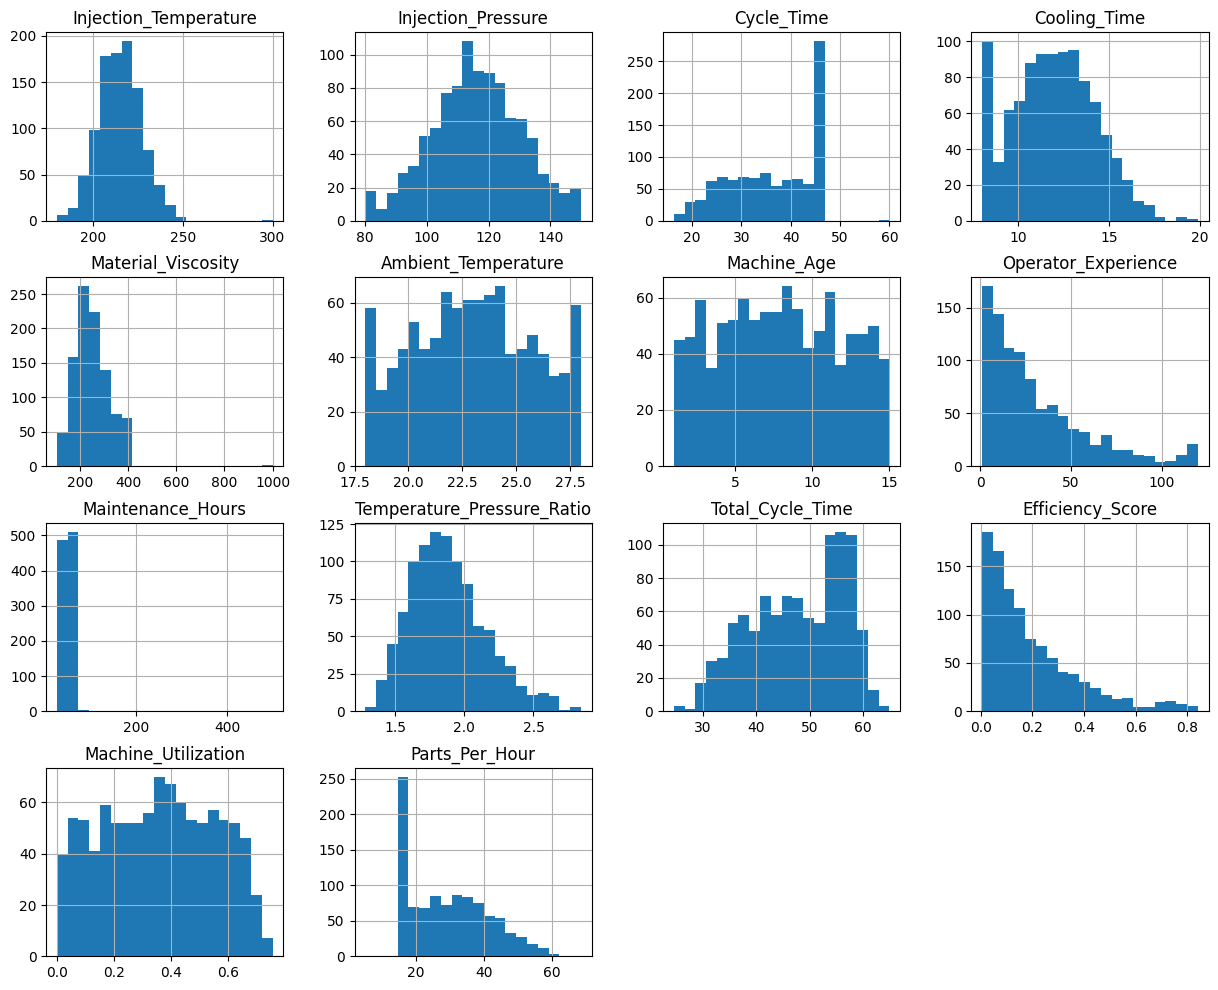

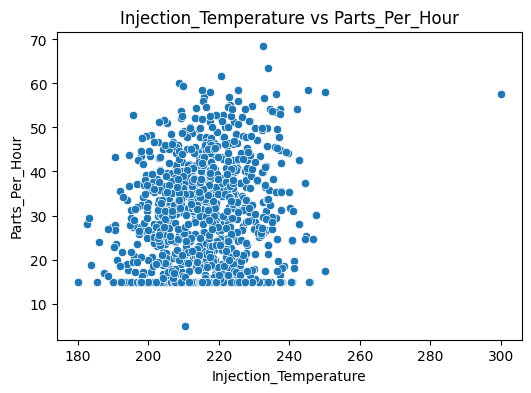

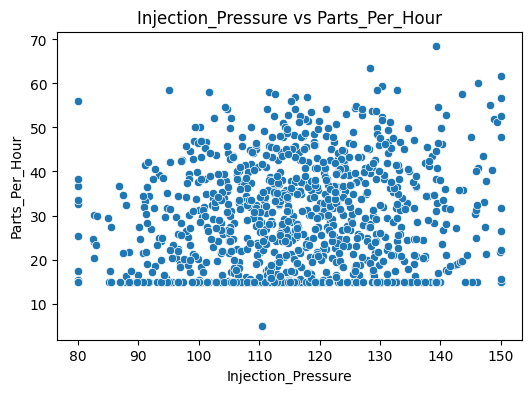

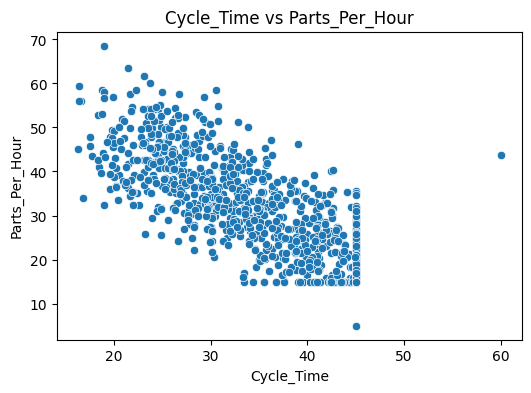

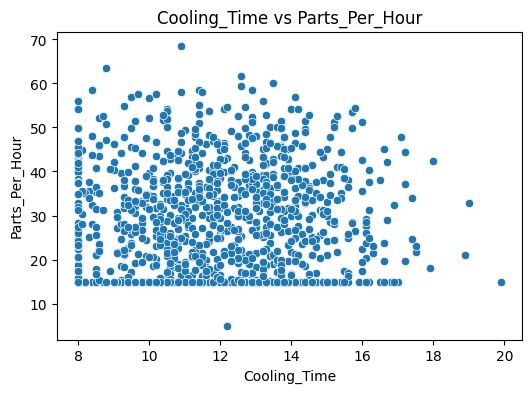

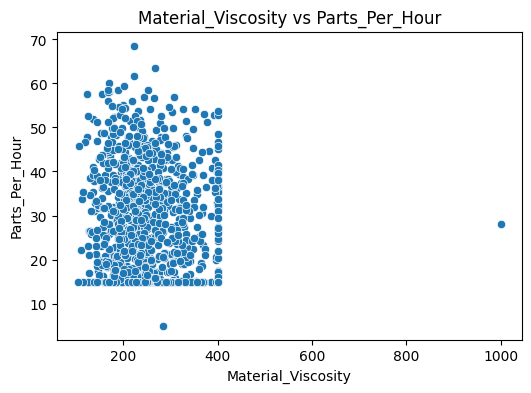

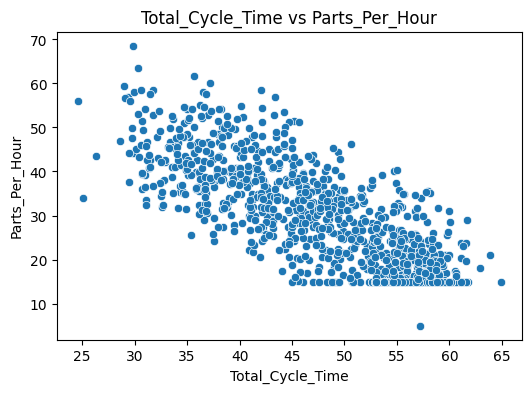

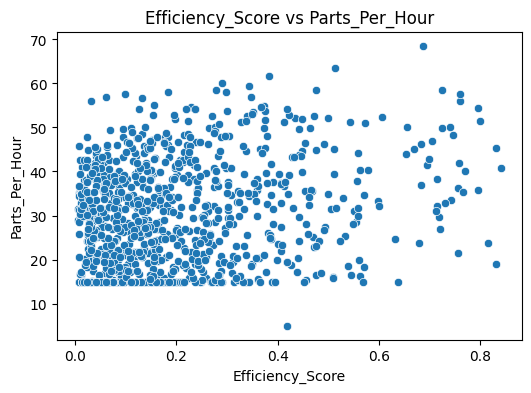

In [4]:
# 1. Check numeric columns
numeric_features = df.select_dtypes(include=np.number).columns
print("Numeric features:\n", numeric_features)

# 2. Correlation matrix for numeric features
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# 3. Histograms of numeric features
df[numeric_features].hist(figsize=(15,12), bins=20)
plt.show()

# 4. Scatter plots for key numeric features vs Parts_Per_Hour
key_features = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time', 
                'Cooling_Time', 'Material_Viscosity', 'Total_Cycle_Time', 'Efficiency_Score']
for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['Parts_Per_Hour'])
    plt.title(f'{feature} vs Parts_Per_Hour')
    plt.show()


In [12]:
# 1. Select features for modeling
features = ['Injection_Temperature', 'Injection_Pressure', 'Cycle_Time',
            'Cooling_Time', 'Material_Viscosity', 'Ambient_Temperature',
            'Machine_Age', 'Operator_Experience', 'Maintenance_Hours',
            'Temperature_Pressure_Ratio', 'Total_Cycle_Time', 
            'Efficiency_Score', 'Machine_Utilization']

X = df[features]
y = df['Parts_Per_Hour']

# 2. Handle missing values by filling with median
X = X.fillna(X.median())
y = y.fillna(y.median())

# 3. Handle outliers using IQR method
for col in features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = np.where(X[col] < lower, lower, X[col])
    X[col] = np.where(X[col] > upper, upper, X[col])

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (800, 13)
Test set shape: (200, 13)


In [14]:
# Create Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


Training R²: 0.8869536902346439
Test R²: 0.8556455635889185
Training RMSE: 4.053402724686795
Test RMSE: 4.340186837146206
Training MAE: 3.2265474677331123
Test MAE: 3.4600670663157116


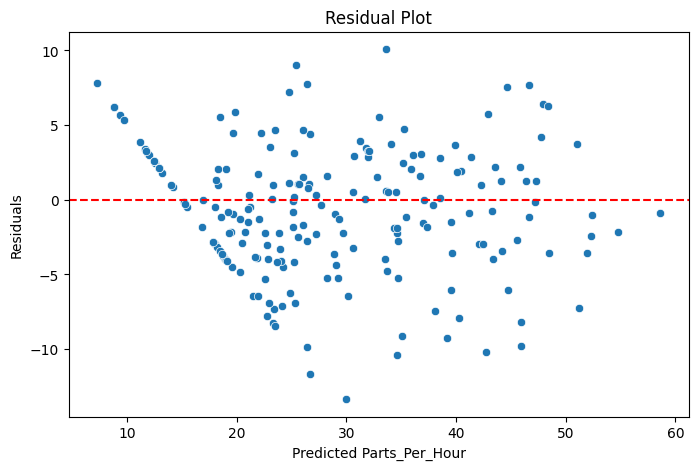

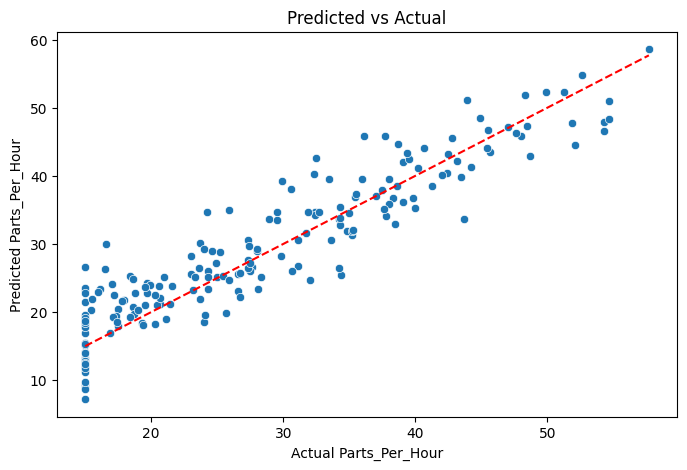

In [15]:


# 1️⃣ Calculate metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Training R²:", r2_train)
print("Test R²:", r2_test)
print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Training MAE:", mae_train)
print("Test MAE:", mae_test)

# 2️⃣ Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Parts_Per_Hour")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 3️⃣ Predicted vs Actual
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Parts_Per_Hour")
plt.ylabel("Predicted Parts_Per_Hour")
plt.title("Predicted vs Actual")
plt.show()


In [16]:
# Get model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Sort by absolute impact
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature impact on Parts_Per_Hour:\n")
print(coefficients[['Feature', 'Coefficient']])


Feature impact on Parts_Per_Hour:

                       Feature  Coefficient
11            Efficiency_Score    19.177727
12         Machine_Utilization     5.477693
9   Temperature_Pressure_Ratio    -4.704306
3                 Cooling_Time     1.286461
10            Total_Cycle_Time    -1.263471
0        Injection_Temperature     0.204806
6                  Machine_Age    -0.202404
1           Injection_Pressure     0.052949
2                   Cycle_Time     0.050793
7          Operator_Experience     0.042944
4           Material_Viscosity    -0.014692
5          Ambient_Temperature    -0.006932
8            Maintenance_Hours    -0.006244


In [25]:
# Example: predict Parts_Per_Hour for a specific row in X
row_number = 11  # change this to any row you want

# Select the row and reshape for prediction
sample_input = X.iloc[row_number].values.reshape(1, -1)

# Predict using trained Linear Regression model
prediction = model.predict(sample_input)

print(f"Predicted Parts_Per_Hour for row {row_number}: {prediction[0]:.2f}")


Predicted Parts_Per_Hour for row 11: 40.61
